>
> # MaaS Sim tutorial
>
> ## Platform operating two sided queues
>
-----
demonstrate if system works fine when `demand>supply`, and `supply>demand`

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import MaaSSim
import MaaSSim.utils
import logging
from MaaSSim.simulators import simulate
from MaaSSim.driver import VehicleAgent, driverEvent
from MaaSSim.utils import initialize_df
from MaaSSim.data_structures import structures as inData

In [3]:
params = MaaSSim.utils.get_config('../../data/config/default.json')

In [4]:
def testQ(params, nP = 10,nV = 10):
    params.times.patience = 3600 # 1 hour of simulation
    params.simTime = 1 # 1 hour of simulation
    params.nP = nP # reuqests (and passengers)
    params.nV = nV # vehicles
    sim = simulate(params = params)
    Qs = sim.runs[0].queues
    Qs.groupby('platform')[['vehQ','reqQ']].plot(drawstyle = 'steps-post')    
    return sim

13-10-20 09:59:53-WARNING-Setting up 1h simulation at 2020-10-13 09:32:45 for 5 vehicles and 15 passengers in Nootdorp, Netherlands
13-10-20 09:59:53-INFO--------------------	Starting simulation	-------------------
13-10-20 09:59:53-INFO-pax    1  got to dest at                           2020-10-13 09:37:49
13-10-20 09:59:53-INFO-pax    0  got to dest at                           2020-10-13 09:38:55
13-10-20 09:59:53-INFO-pax    4  got to dest at                           2020-10-13 09:47:55
13-10-20 09:59:53-INFO-pax    3  got to dest at                           2020-10-13 09:48:43
13-10-20 09:59:53-INFO-pax    2  got to dest at                           2020-10-13 09:49:23
13-10-20 09:59:53-INFO-pax    5  got to dest at                           2020-10-13 09:51:54
13-10-20 09:59:53-INFO-pax    6  got to dest at                           2020-10-13 09:56:46
13-10-20 09:59:53-INFO-pax    7  got to dest at                           2020-10-13 09:58:17
13-10-20 09:59:53-INFO-pax    8  

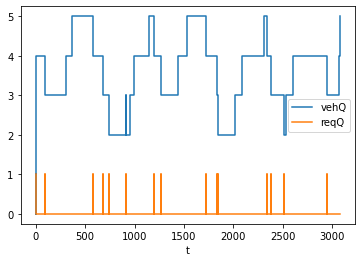

In [5]:
sim = testQ(params, nP = 15, nV = 5)

13-10-20 09:59:54-WARNING-Setting up 1h simulation at 2020-10-13 09:34:41 for 50 vehicles and 5 passengers in Nootdorp, Netherlands
13-10-20 09:59:54-INFO--------------------	Starting simulation	-------------------
13-10-20 09:59:54-INFO-pax    0  got to dest at                           2020-10-13 09:41:39
13-10-20 09:59:54-INFO-pax    1  got to dest at                           2020-10-13 10:12:31
13-10-20 09:59:54-INFO-pax    2  got to dest at                           2020-10-13 10:25:38
13-10-20 09:59:54-INFO-pax    3  got to dest at                           2020-10-13 10:27:33
13-10-20 09:59:54-INFO-pax    4  got to dest at                           2020-10-13 10:29:34
13-10-20 09:59:54-INFO-veh    2  quitted shift                            2020-10-13 12:34:40
13-10-20 09:59:54-INFO-veh    3  quitted shift                            2020-10-13 12:34:40
13-10-20 09:59:55-INFO-veh    4  quitted shift                            2020-10-13 12:34:40
13-10-20 09:59:55-INFO-veh    5  

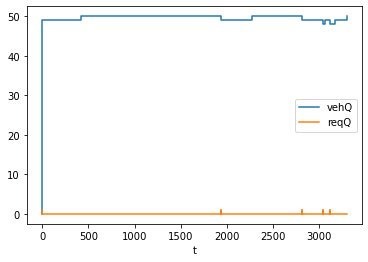

In [6]:
testQ(params, nP = 5, nV = 50)

13-10-20 09:59:55-WARNING-Setting up 1h simulation at 2020-10-13 09:30:21 for 3 vehicles and 50 passengers in Nootdorp, Netherlands
13-10-20 09:59:55-INFO--------------------	Starting simulation	-------------------
13-10-20 09:59:56-INFO-pax    0  got to dest at                           2020-10-13 09:37:28
13-10-20 09:59:56-INFO-pax    2  got to dest at                           2020-10-13 09:37:46
13-10-20 09:59:56-INFO-pax    1  got to dest at                           2020-10-13 09:38:19
13-10-20 09:59:56-INFO-pax    5  got to dest at                           2020-10-13 09:44:54
13-10-20 09:59:56-INFO-pax    4  got to dest at                           2020-10-13 09:47:39
13-10-20 09:59:56-INFO-pax   11  got to dest at                           2020-10-13 09:48:47
13-10-20 09:59:56-INFO-pax    3  got to dest at                           2020-10-13 09:48:55
13-10-20 09:59:56-INFO-pax    6  got to dest at                           2020-10-13 09:51:20
13-10-20 09:59:56-INFO-pax   12  

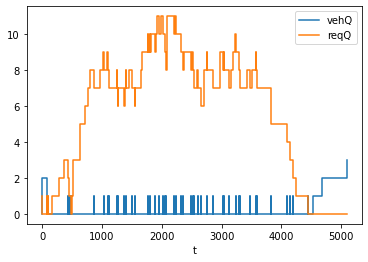

In [7]:
testQ(params, nP = 50, nV = 3)

batched platform

In [8]:
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber', 600]
inData.platforms

,fare,name,batch_time
id,,,
0,1,Uber,600


13-10-20 09:59:58-WARNING-Setting up 1h simulation at 2020-10-13 09:31:25 for 3 vehicles and 50 passengers in Nootdorp, Netherlands
13-10-20 09:59:58-INFO--------------------	Starting simulation	-------------------
13-10-20 09:59:59-INFO-pax    1  got to dest at                           2020-10-13 09:37:49
13-10-20 09:59:59-INFO-pax    0  got to dest at                           2020-10-13 09:40:08
13-10-20 09:59:59-INFO-pax    2  got to dest at                           2020-10-13 09:40:21
13-10-20 09:59:59-INFO-pax    3  got to dest at                           2020-10-13 09:47:49
13-10-20 09:59:59-INFO-pax   12  got to dest at                           2020-10-13 09:47:57
13-10-20 09:59:59-INFO-pax    9  got to dest at                           2020-10-13 09:50:00
13-10-20 09:59:59-INFO-pax   19  got to dest at                           2020-10-13 09:56:25
13-10-20 09:59:59-INFO-pax   11  got to dest at                           2020-10-13 09:57:54
13-10-20 09:59:59-INFO-pax    8  

platform
0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

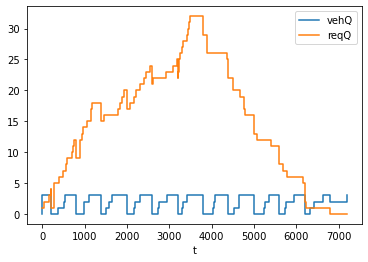

In [9]:
sim = simulate(params = params, inData = inData, event_based = False)
Qs = sim.runs[0].queues
Qs.groupby('platform')[['vehQ','reqQ']].plot(drawstyle = 'steps-post')    

-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl